In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from IPython.display import Image
import numpy as np
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /content/gdrive

MyDrive  Shareddrives


In [9]:
# Augmentation and splitting 20% dataset for validation
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    height_shift_range=0.2,
    shear_range=0.2,
    validation_split=0.2
)

#Training_generator
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/DATASET',  
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        shuffle = True,
        class_mode='categorical')

#Validation_generator
validation_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/DATASET',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        subset='validation')

Found 600 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [10]:
#Model
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(2, activation='softmax')
  ])
  
  return model

In [19]:
model=create_model()
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_generator,
          epochs=6,
          validation_data=validation_generator)

Epoch 1/6
19/19 [==============================] - 37s 2s/step - loss: 0.6917 - accuracy: 0.7683 - val_loss: 0.0523 - val_accuracy: 0.9917
Epoch 2/6
19/19 [==============================] - 35s 2s/step - loss: 0.1109 - accuracy: 0.9667 - val_loss: 0.0911 - val_accuracy: 0.9750
Epoch 3/6
19/19 [==============================] - 35s 2s/step - loss: 0.0975 - accuracy: 0.9700 - val_loss: 0.0224 - val_accuracy: 0.9917
Epoch 4/6
19/19 [==============================] - 35s 2s/step - loss: 0.0965 - accuracy: 0.9717 - val_loss: 0.0448 - val_accuracy: 0.9917
Epoch 5/6
19/19 [==============================] - 35s 2s/step - loss: 0.0771 - accuracy: 0.9800 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 6/6
19/19 [==============================] - 35s 2s/step - loss: 0.0617 - accuracy: 0.9800 - val_loss: 0.0253 - val_accuracy: 0.9917


In [20]:
model.evaluate(validation_generator)

4/4 [==============================] - 5s 1s/step - loss: 0.0405 - accuracy: 0.9917


[0.040459077805280685, 0.9916666746139526]

In [21]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 128)     

Text(0.5, 1.0, 'Training and validation loss')

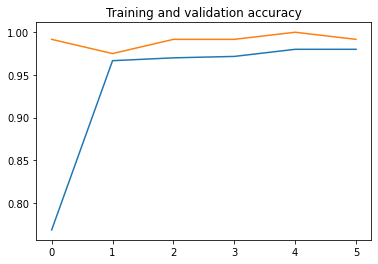

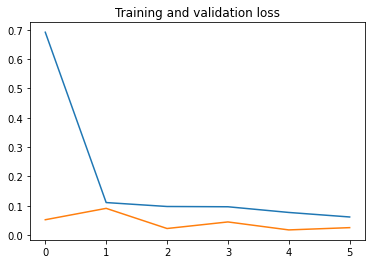

In [22]:
import matplotlib.pyplot as plt

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [31]:
from keras.preprocessing import image
from IPython.display import Image
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor
  
#img_path = 'C:/Users/Ferhat/Python Code/Workshop/Tensoorflow transfer learning/blue_tit.jpg'
img_path = '/content/gdrive/MyDrive/TESTREAL/WhatsApp Image 2022-05-27 at 15.38.29.jpeg'
new_image = load_image(img_path)

pred1 = model.predict(new_image)

pred = np.argmax(pred1, axis=1)
pred

array([1])

In [29]:
export_dir = '/content/gdrive/MyDrive/Model'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Model/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Model/assets


In [30]:
import tensorflow as tf


# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)